# 数据规约
对属性和数值进行规约获得一个比原数据集小的多的规约表示，但仍接近原数据的完整性，在规约后数据集上挖掘可产生近乎相同的分析结果
属性规约：
- 向前选择
- 向后删除
- 决策树
- PCA
数值规约：
- 有参方法（回归法、对数线性模型）
- 无参方法（直方图、聚类、抽样）

## 属性规约——PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
boston = datasets.load_boston()

In [4]:
X = preprocessing.scale(boston.data)

In [5]:
pca = PCA(n_components='mle')

In [6]:
pca.fit(X)

PCA(n_components='mle')

In [7]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331])

In [8]:
sum(pca.explained_variance_ratio_)

0.9951146722737331

## 数值规约——直方图
表现：
- 用分箱表示数据分布
- 每个箱子代表一个属性-频率对

In [24]:
data = np.random.randint(1, 10, 50)

(array([2., 8., 4., 7., 0., 8., 4., 5., 4., 8.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

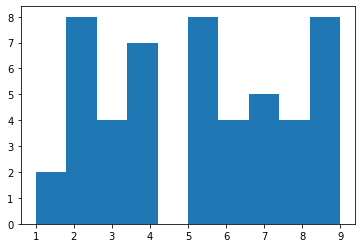

In [25]:
plt.hist(data)

In [26]:
bins = np.linspace(data.min(), data.max(), 4, endpoint=True)

In [27]:
bins

array([1.        , 3.66666667, 6.33333333, 9.        ])

(array([14., 19., 17.]),
 array([1.        , 3.66666667, 6.33333333, 9.        ]),
 <BarContainer object of 3 artists>)

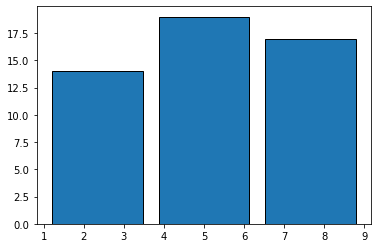

In [28]:
plt.hist(data, bins=bins, rwidth=0.85, edgecolor='k')

## 数值规约——抽样

In [30]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)

In [31]:
iris_df.columns = iris.feature_names

In [32]:
iris_df.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
31,5.4,3.4,1.5,0.4
56,6.3,3.3,4.7,1.6
80,5.5,2.4,3.8,1.1
63,6.1,2.9,4.7,1.4
109,7.2,3.6,6.1,2.5
142,5.8,2.7,5.1,1.9
4,5.0,3.6,1.4,0.2
41,4.5,2.3,1.3,0.3
119,6.0,2.2,5.0,1.5
125,7.2,3.2,6.0,1.8


In [33]:
iris_df.sample(frac=0.2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
57,4.9,2.4,3.3,1.0
23,5.1,3.3,1.7,0.5
7,5.0,3.4,1.5,0.2
125,7.2,3.2,6.0,1.8
109,7.2,3.6,6.1,2.5
113,5.7,2.5,5.0,2.0
105,7.6,3.0,6.6,2.1
34,4.9,3.1,1.5,0.2
58,6.6,2.9,4.6,1.3
40,5.0,3.5,1.3,0.3


In [34]:
iris_df.sample(n=10, replace=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
128,6.4,2.8,5.6,2.1
20,5.4,3.4,1.7,0.2
6,4.6,3.4,1.4,0.3
136,6.3,3.4,5.6,2.4
1,4.9,3.0,1.4,0.2
149,5.9,3.0,5.1,1.8
68,6.2,2.2,4.5,1.5
6,4.6,3.4,1.4,0.3
12,4.8,3.0,1.4,0.1
65,6.7,3.1,4.4,1.4


In [37]:
# 分层抽样
iris_df['target'] = iris.target

In [39]:
iris_df[iris_df.target == 0].sample(frac=0.3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
26,5.0,3.4,1.6,0.4,0
27,5.2,3.5,1.5,0.2,0
38,4.4,3.0,1.3,0.2,0
43,5.0,3.5,1.6,0.6,0
21,5.1,3.7,1.5,0.4,0
5,5.4,3.9,1.7,0.4,0
45,4.8,3.0,1.4,0.3,0
36,5.5,3.5,1.3,0.2,0
10,5.4,3.7,1.5,0.2,0
19,5.1,3.8,1.5,0.3,0
